### Student Information
Name: 謝宛庭

Student ID: 106061577

GitHub ID: EileenHsieh

## Table of Contents
1. Data Preparation
2. Data Transformation
 - 2.1 Converting Dictionary into Pandas dataframe
 - 2.2 Familiarizing yourself with the Data
3. Data Mining using Pandas
 - 3.1 Dealing with Missing Values
 - 3.2 Dealing with Duplicate Data
4. Data Preprocessing
 - 4.1 Sampling
 - 4.2 Feature Creation
 - 4.3 Feature Subset Selection
 - 4.4 Dimensionality Reduction
 - 4.5 Atrribute Transformation / Aggregation
 - 4.6 Discretization and Binarization
5. Similarity and Classfication
 - 5.1 Similarity
 - 5.2 Classsification
6. Conclusion


## 1. Data Preparation

---

### 1.1 Data Preprocessing

In [3]:
import numpy as np
import glob
import pandas as pd

def ReadTxt(path):
    f = open(path, encoding='utf-8')
    txtmat = []
    
    for line in f.readlines():
        elements = line.split('\t')
        elements[1]=int(elements[1].split('\n')[0])
        txtmat.append(elements)
    f.close()
    return txtmat

In [4]:
path = glob.glob('./sentiment labelled sentences/*txt') ##load the data path

data=[]
for p in path:
    data.append(ReadTxt(p))
data = np.vstack(data)
len(data)

3000

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. 

In [5]:
for i in range(3):
    print("\n".join(data[i]))

So there is no way for me to plug it in here in the US unless I go by a converter.
0
Good case, Excellent value.
1
Great for the jawbone.
1


## 2. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table format.

### 2.1 Converting Dictionary into Pandas Dataframe
Here we will show you how to convert dictionary objects into a pandas dataframe. And by the way, a pandas dataframe is nothing more than a table magically stored for efficient information retrieval.

In [6]:
path = glob.glob('./sentiment labelled sentences/*txt') ##load the data path

### make dataframe
X = pd.DataFrame(columns=['text', 'category', 'category_name'])
for p in path:
    data = ReadTxt(p)
    df = pd.DataFrame(data=data, columns=['text', 'category'])
    df2 = pd.DataFrame(np.tile(p.split('\\')[-1].split('.')[0],len(data)),columns=['category_name'])
    df = pd.concat([df,df2],axis=1)
    X = pd.concat([X,df],axis=0, ignore_index=True)
    

In [7]:
len(X)

3000

In [8]:
X[0:2]

,text,category,category_name
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled
1,"Good case, Excellent value.",1,amazon_cells_labelled


### 2.2 Familiarizing with the Data

In [9]:
# a simple query
X[0:10][["text", "category_name"]]

,text,category_name
0,So there is no way for me to plug it in here i...,amazon_cells_labelled
1,"Good case, Excellent value.",amazon_cells_labelled
2,Great for the jawbone.,amazon_cells_labelled
3,Tied to charger for conversations lasting more...,amazon_cells_labelled
4,The mic is great.,amazon_cells_labelled
5,I have to jiggle the plug to get it to line up...,amazon_cells_labelled
6,If you have several dozen or several hundred c...,amazon_cells_labelled
7,If you are Razr owner...you must have this!,amazon_cells_labelled
8,"Needless to say, I wasted my money.",amazon_cells_labelled
9,What a waste of money and time!.,amazon_cells_labelled


In [10]:
# using loc (by position)
X.iloc[::10, :][0:10]

,text,category,category_name
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled
10,And the sound quality is great.,1,amazon_cells_labelled
20,I went on Motorola's website and followed all ...,0,amazon_cells_labelled
30,"This is a simple little phone to use, but the ...",0,amazon_cells_labelled
40,"It has a great camera thats 2MP, and the pics ...",1,amazon_cells_labelled
50,Not loud enough and doesn't turn on like it sh...,0,amazon_cells_labelled
60,Essentially you can forget Microsoft's tech su...,0,amazon_cells_labelled
70,Mic Doesn't work.,0,amazon_cells_labelled
80,I wear it everyday and it holds up very well.,1,amazon_cells_labelled
90,For a product that costs as much as this one d...,0,amazon_cells_labelled


In [11]:
# using loc (by label)
X.loc[::10, 'text'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: text, dtype: object

In [12]:
# standard query (Cannot simultaneously select rows and columns)
X[::10][0:10]

,text,category,category_name
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled
10,And the sound quality is great.,1,amazon_cells_labelled
20,I went on Motorola's website and followed all ...,0,amazon_cells_labelled
30,"This is a simple little phone to use, but the ...",0,amazon_cells_labelled
40,"It has a great camera thats 2MP, and the pics ...",1,amazon_cells_labelled
50,Not loud enough and doesn't turn on like it sh...,0,amazon_cells_labelled
60,Essentially you can forget Microsoft's tech su...,0,amazon_cells_labelled
70,Mic Doesn't work.,0,amazon_cells_labelled
80,I wear it everyday and it holds up very well.,1,amazon_cells_labelled
90,For a product that costs as much as this one d...,0,amazon_cells_labelled


### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes.

In [13]:
k=X[lambda df: df.columns[0]]
k[::10][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: text, dtype: object

### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```amazon_cells_labelled``` category, and query every 10th record. Only show the first 5 records.

In [14]:
X[X['category_name'] == 'amazon_cells_labelled'][::10][0:5]

,text,category,category_name
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled
10,And the sound quality is great.,1,amazon_cells_labelled
20,I went on Motorola's website and followed all ...,0,amazon_cells_labelled
30,"This is a simple little phone to use, but the ...",0,amazon_cells_labelled
40,"It has a great camera thats 2MP, and the pics ...",1,amazon_cells_labelled


## 3. Data Mining using Pandas

### 3.1 Missing Values

In [15]:
X.isnull()

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [16]:
# check if data is missing in other way
import helpers.data_mining_helpers as dmh
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [17]:
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
5       (The amoung of missing records is: , 0)
6       (The amoung of missing records is: , 0)
7       (The amoung of missing records is: , 0)
8       (The amoung of missing records is: , 0)
9       (The amoung of missing records is: , 0)
10      (The amoung of missing records is: , 0)
11      (The amoung of missing records is: , 0)
12      (The amoung of missing records is: , 0)
13      (The amoung of missing records is: , 0)
14      (The amoung of missing records is: , 0)
15      (The amoung of missing records is: , 0)
16      (The amoung of missing records is: , 0)
17      (The amoung of missing records is: , 0)
18      (The amoung of missing records is: , 0)
19      (The amoung of missing records is: , 0)
20      (The amoung of missing records i

In [18]:
# insert dummy to check if dmh function works well
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
result_with_series = X.append(dummy_series, ignore_index=True)
len(result_with_series)
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
dtype: object

In [19]:
# remove the missing value we just made
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))
len(X)

3000

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [20]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [21]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

It happens because ''!=None, '' == None will turn out to be False.

In [22]:
''==None

False

### 3.2 Dealing with Duplicate Data

In [23]:
X.duplicated()
sum(X.duplicated('text'))

17

In [24]:
#there were 17 duplicated data in our dataframe, let's get rid of it!
X.drop_duplicates(keep='first', inplace=True) # inplace applies changes directly on our dataframe

In [25]:
len(X)

2983

## 4.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to peform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

### 4.1 Sampling

In [26]:
X_sample = X.sample(n=1000)
X_sample[0:4]

,text,category,category_name
1220,"The plot simply rumbles on like a machine, des...",0,imdb_labelled
222,"Simple, lightweight and great fit.",1,amazon_cells_labelled
2879,"Now the burgers aren't as good, the pizza whic...",0,yelp_labelled
2129,Definitely worth venturing off the strip for t...,1,yelp_labelled


### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

After sampling, the indices is not listed in order anymore, since it randomly chooses a row.

In [27]:
import matplotlib.pyplot as plt
categories = list(np.unique(X['category_name'])) # get category_name
categories

['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled']

### >>> **Exercise 7 (5 min):**
Automate `ylim` parameters instead of hard-coding it

imdb_labelled            997
yelp_labelled            996
amazon_cells_labelled    990
Name: category_name, dtype: int64


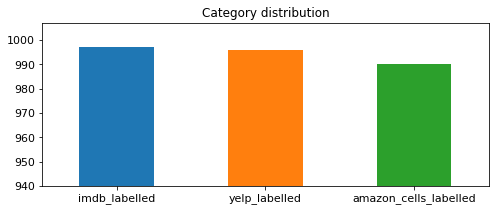

In [28]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [min(X.category_name.value_counts()-50), max(X.category_name.value_counts())+10],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

amazon_cells_labelled    361
imdb_labelled            326
yelp_labelled            313
Name: category_name, dtype: int64


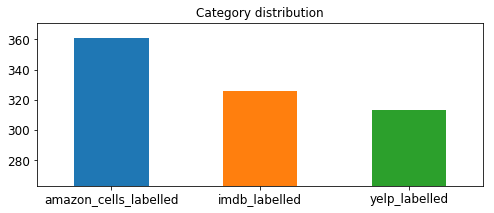

In [29]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [min(X_sample.category_name.value_counts()-50), max(X_sample.category_name.value_counts())+10], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

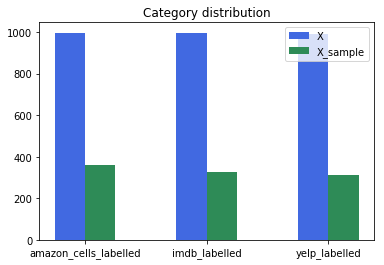

In [30]:
#side-by-side comparison of the distribution between the X and X_sample
width = 0.25 # the width of the bars
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(len(categories)), X.category_name.value_counts(),width, color='royalblue')
rects2 = ax.bar(np.arange(len(categories))+width, X_sample.category_name.value_counts(), width, color='seagreen')
# add some
ax.set_title('Category distribution')
ax.set_xticks(np.arange(len(categories)) + width / 2)
ax.set_xticklabels((categories[0], categories[1], categories[2]))
ax.legend((rects1[0], rects2[0]), ('X', 'X_sample'))

### 4.2 Feature Creation

In [31]:
import nltk
nltk.download('punkt')
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]["unigrams"]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Eileen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [32]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 4.3 Feature subset selection

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
X_counts

<2983x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 31515 stored elements in Compressed Sparse Row format>

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [34]:
analyze = count_vect.build_analyzer()
X['analyze'] = X['text'].apply(lambda x: analyze(x))
X[0:4]

,text,category,category_name,unigrams,analyze
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it...","[so, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]","[good, case, excellent, value]"
2,Great for the jawbone.,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]","[great, for, the, jawbone]"
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin...","[tied, to, charger, for, conversations, lastin..."


In [35]:
X_counts.shape

(2983, 5155)

In [36]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [37]:
# we convert from sparse array to normal array
X_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**
Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [38]:
count_vect.get_feature_names()[np.where(X_counts[0:5,0:100].toarray())[0][0]]

'11'

In [39]:
# let us look at this nice little heat map of our term-document matrix.
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()


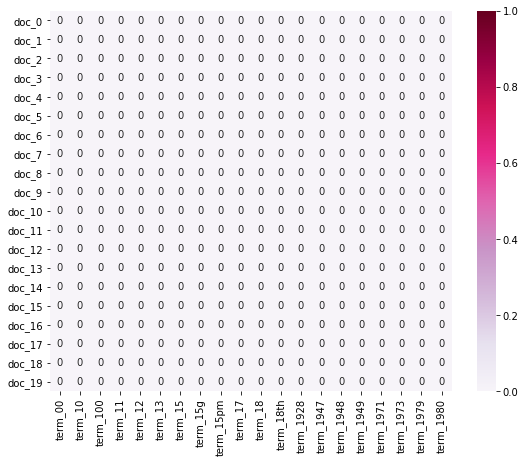

In [40]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

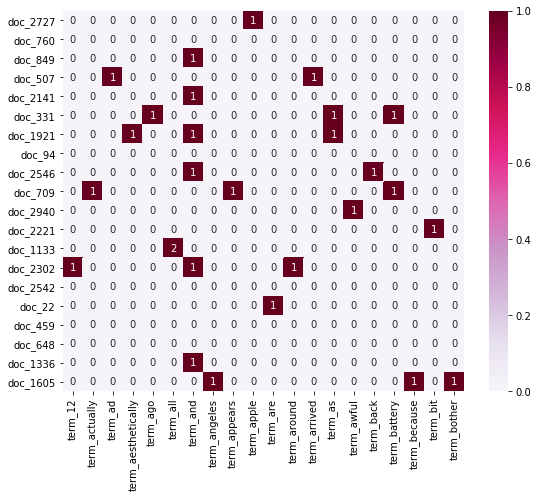

In [41]:
# Getting a nice and useful visualization by sampling
X_sample = X.sample(n=20)

count_vect_sample = CountVectorizer()
X_sample_counts = count_vect_sample.fit_transform(X_sample.text)

plot_x = ["term_"+str(i) for i in count_vect_sample.get_feature_names()[:20]]

plot_y = ["doc_"+ str(i) for i in list(X_sample.index)[0:20]]
plot_z = X_sample_counts[0:20, 0:20].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 4.4 Dimensionality Reduction

In [42]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced.shape

(2983, 2)

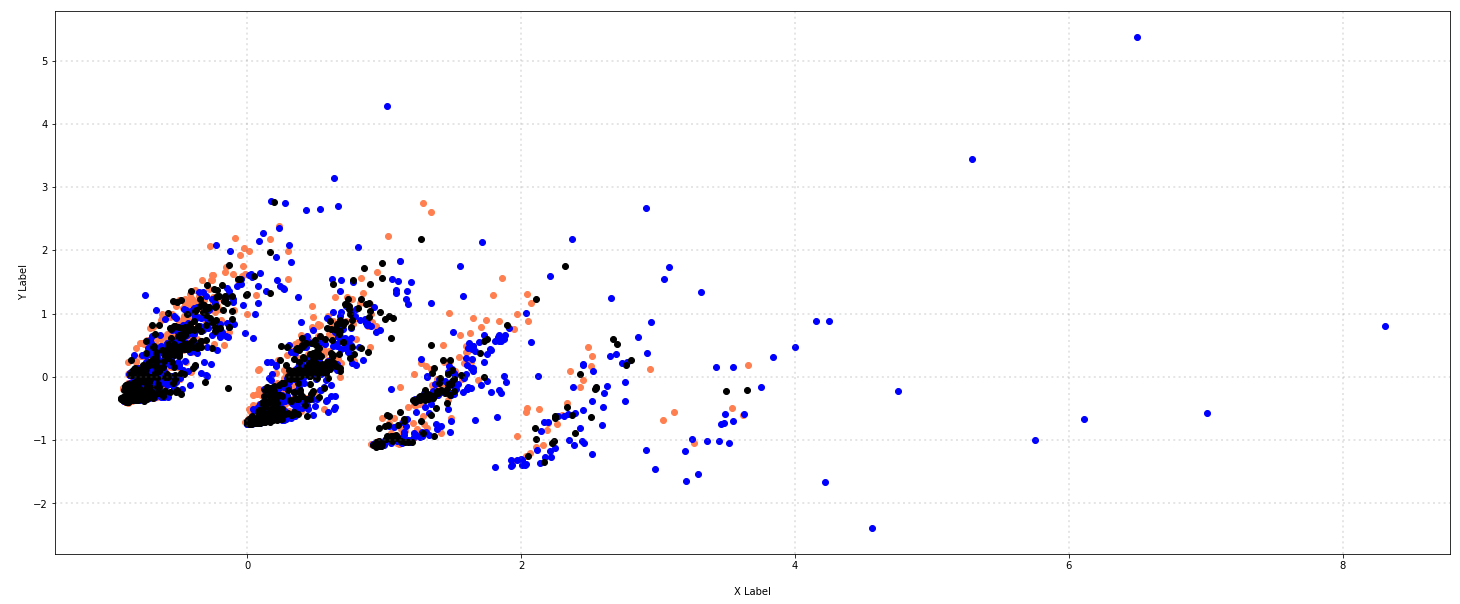

In [43]:
col = ['coral', 'blue', 'black']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

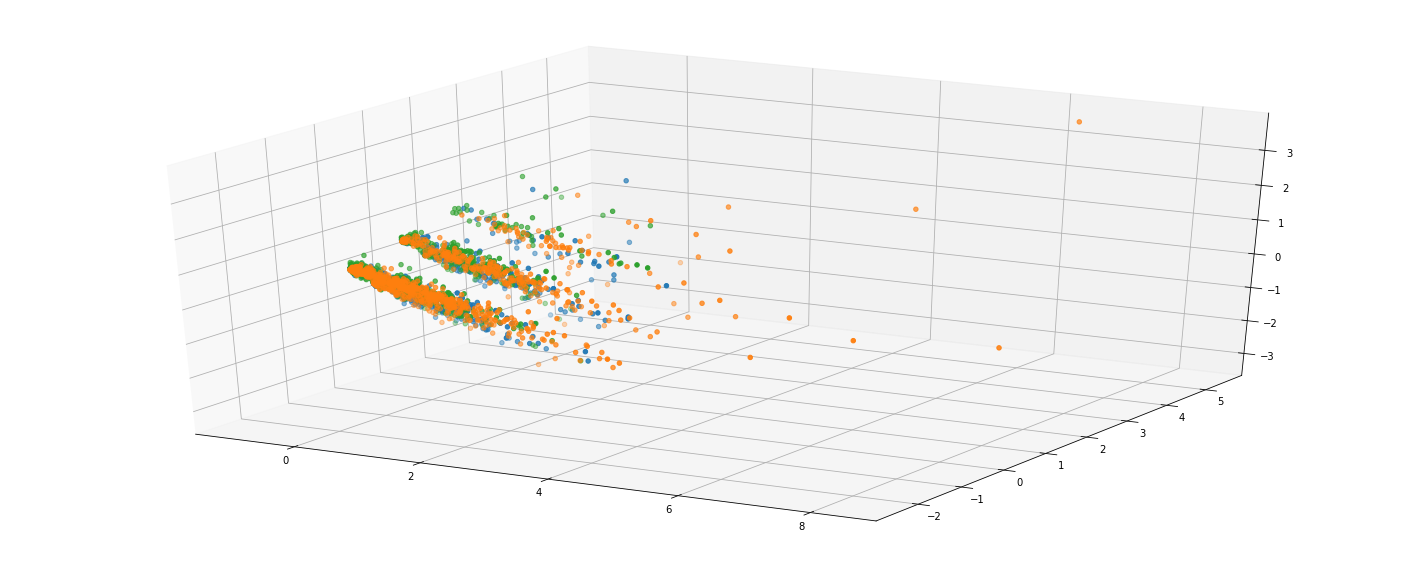

In [44]:
# 3D plot
from mpl_toolkits.mplot3d import Axes3D
XX_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.gca(projection='3d')

for c, category in zip(col, categories):
    xs = XX_reduced[X['category_name'] == category].T[0]
    ys = XX_reduced[X['category_name'] == category].T[1]
    zs = XX_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, zdir='X') #zdir = x or y or z
plt.show()

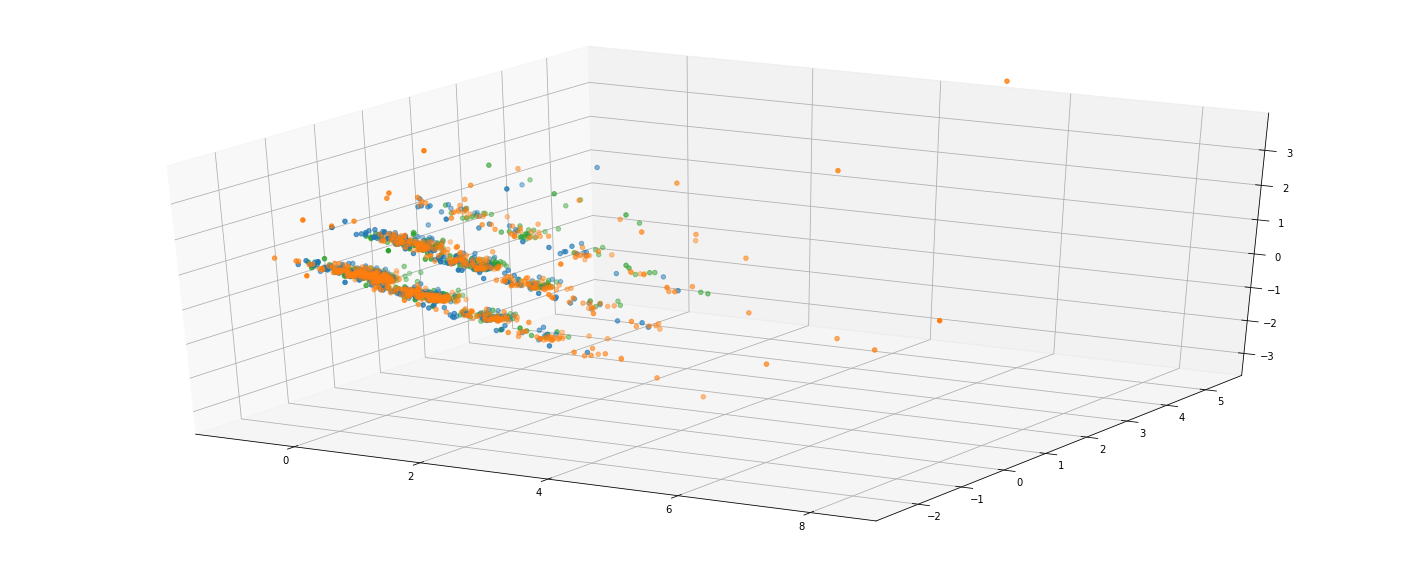

In [45]:
# 3D plot
from mpl_toolkits.mplot3d import Axes3D
XX_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.gca(projection='3d')

for c, category in zip(col, categories):
    xs = XX_reduced[X['category_name'] == category].T[0]
    ys = XX_reduced[X['category_name'] == category].T[1]
    zs = XX_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, zdir='y') #zdir = x or y or z
plt.show()

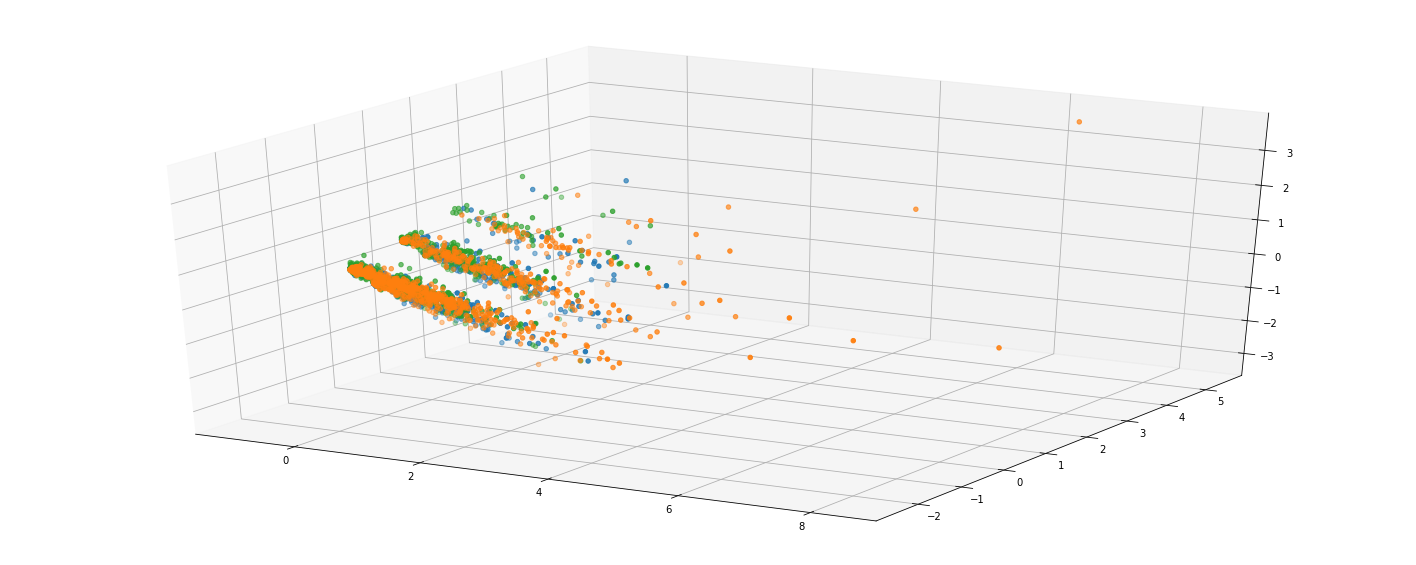

In [46]:
# 3D plot
from mpl_toolkits.mplot3d import Axes3D
XX_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.gca(projection='3d')

for c, category in zip(col, categories):
    xs = XX_reduced[X['category_name'] == category].T[0]
    ys = XX_reduced[X['category_name'] == category].T[1]
    zs = XX_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, zdir='z') #zdir = x or y or z
plt.show()

### 4.5 Atrribute Transformation / Aggregation

In [47]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]

1

In [48]:
X_counts.shape

(2983, 5155)

In [49]:
# Generate TF-IDF features from the tokens of each text
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_TFIDF = vectorizer.fit_transform(X.text)
X_TFIDF.shape

(2983, 5155)

In [50]:
tfIDF = []
for j in range(0,X_TFIDF.shape[1]):
    tfIDF.append(sum(X_TFIDF[:,j].toarray()))
tfIDF = np.asarray(X_TFIDF.sum(axis=0))[0]
tfIDF[0]

0.3384298630892861

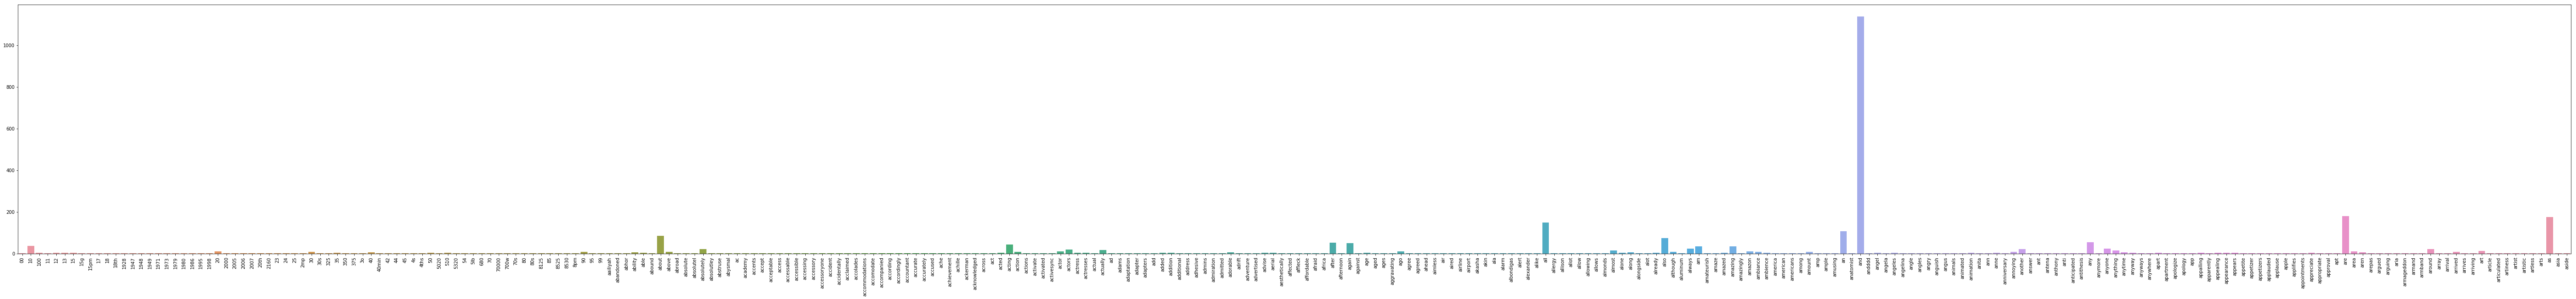

In [51]:
# plot term frequencies
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

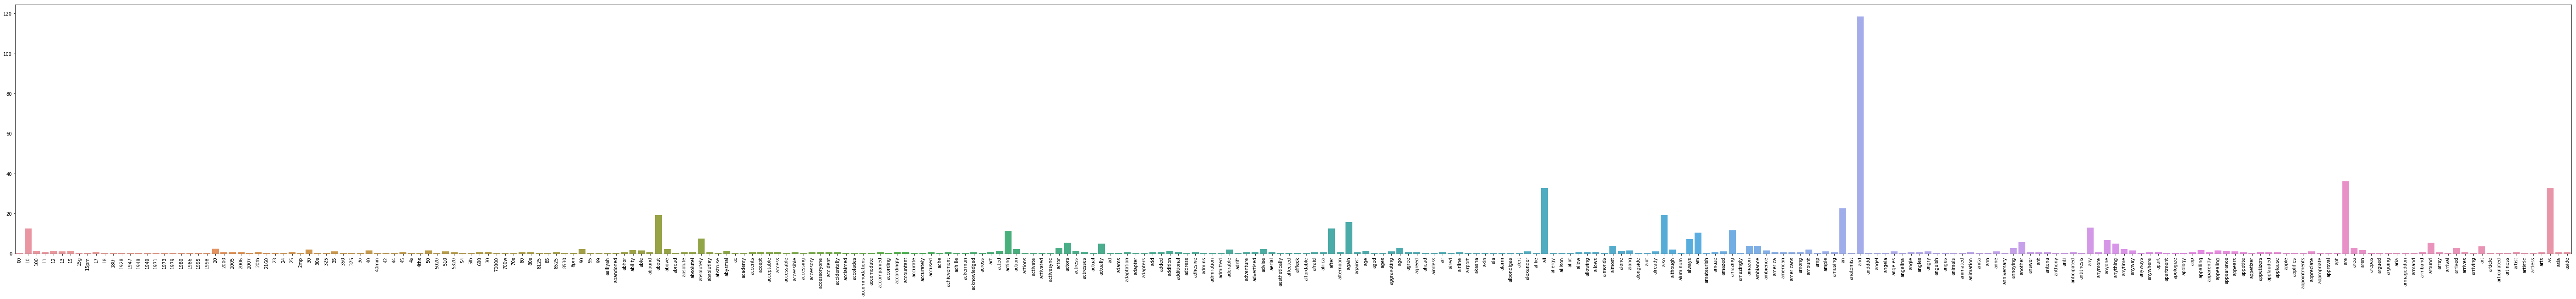

In [52]:
# plot tf-iDF
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=vectorizer.get_feature_names()[:300], 
            y=tfIDF[:300])
g.set_xticklabels(vectorizer.get_feature_names()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this. Check last year's [notebook](https://github.com/omarsar/data_mining_2017_fall_lab/blob/master/news_data_mining.ipynb) for code on how to generate the interactive version of the plot above. 

In [53]:
# TF
import plotly.plotly as py
import helpers.text_analysis as ta
counts = term_frequencies
names = count_vect.get_feature_names()
py.iplot(ta.plot_word_frequency([names, counts], "Term Frequency Distribution"))

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [84]:
# TF-IDF
import plotly.plotly as py
import helpers.text_analysis as ta
counts = tfIDF
names = vectorizer.get_feature_names()
py.iplot(ta.plot_word_frequency([names, counts], "TF-IDF Distribution"))

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [81]:
# efficiently reduce the number of terms and visualize by plotly
# only keep 1% data which owns higher "term frequency"
import plotly.plotly as py
import helpers.text_analysis as ta
delARR = np.where(term_frequencies<=np.percentile(term_frequencies,99))
counts = np.delete(term_frequencies,delARR)
names = np.delete(count_vect.get_feature_names(),delARR)
py.iplot(ta.plot_word_frequency([names, counts], "Term Frequency Distribution"))

In [83]:
# efficiently reduce the number of terms and visualize by plotly
# only keep 1% data which owns higher "TF-IDF"
import plotly.plotly as py
import helpers.text_analysis as ta
delARR = np.where(tfIDF<=np.percentile(tfIDF,99))
counts = np.delete(tfIDF,delARR)
names = np.delete(vectorizer.get_feature_names(),delARR)
py.iplot(ta.plot_word_frequency([names, counts], "TF-IDF Distribution"))

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [89]:

from operator import itemgetter, attrgetter
counts, names = zip(*sorted(zip(np.log(term_frequencies),count_vect.get_feature_names()),key=itemgetter(0,1), reverse=True))
py.iplot(ta.plot_word_frequency([names, counts], "Term Frequency Distribution"))


PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [ ]:
# TF-IDF
from operator import itemgetter, attrgetter
counts, names = zip(*sorted(zip(np.log(tfIDF),count_vect.get_feature_names()),key=itemgetter(0,1), reverse=True))
py.iplot(ta.plot_word_frequency([names, counts], "Term Frequency Distribution"))


### 4.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [89]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(np.array(list(X.category),dtype='int64'))

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [90]:
mlb.classes_

array([0, 1], dtype=int64)

In [91]:
X['bin_category'] = mlb.transform(list(X['category']))
X[0:9]

,text,category,category_name,unigrams,analyze,bin_category,bin_category_name
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it...","[so, there, is, no, way, for, me, to, plug, it...",0,"[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]","[good, case, excellent, value]",1,"[1, 0, 0]"
2,Great for the jawbone.,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]","[great, for, the, jawbone]",1,"[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin...","[tied, to, charger, for, conversations, lastin...",0,"[1, 0, 0]"
4,The mic is great.,1,amazon_cells_labelled,"[The, mic, is, great, .]","[the, mic, is, great]",1,"[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,amazon_cells_labelled,"[I, have, to, jiggle, the, plug, to, get, it, ...","[have, to, jiggle, the, plug, to, get, it, to,...",0,"[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,amazon_cells_labelled,"[If, you, have, several, dozen, or, several, h...","[if, you, have, several, dozen, or, several, h...",0,"[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,amazon_cells_labelled,"[If, you, are, Razr, owner, ..., you, must, ha...","[if, you, are, razr, owner, you, must, have, t...",1,"[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,amazon_cells_labelled,"[Needless, to, say, ,, I, wasted, my, money, .]","[needless, to, say, wasted, my, money]",0,"[1, 0, 0]"


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [92]:
mlb.fit(X.category_name)
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,analyze,bin_category,bin_category_name
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it...","[so, there, is, no, way, for, me, to, plug, it...",0,"[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]","[good, case, excellent, value]",1,"[1, 0, 0]"
2,Great for the jawbone.,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]","[great, for, the, jawbone]",1,"[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin...","[tied, to, charger, for, conversations, lastin...",0,"[1, 0, 0]"
4,The mic is great.,1,amazon_cells_labelled,"[The, mic, is, great, .]","[the, mic, is, great]",1,"[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,amazon_cells_labelled,"[I, have, to, jiggle, the, plug, to, get, it, ...","[have, to, jiggle, the, plug, to, get, it, to,...",0,"[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,amazon_cells_labelled,"[If, you, have, several, dozen, or, several, h...","[if, you, have, several, dozen, or, several, h...",0,"[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,amazon_cells_labelled,"[If, you, are, Razr, owner, ..., you, must, ha...","[if, you, are, razr, owner, you, must, have, t...",1,"[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,amazon_cells_labelled,"[Needless, to, say, ,, I, wasted, my, money, .]","[needless, to, say, wasted, my, money]",0,"[1, 0, 0]"


## 5. Similarity and classification

### 5.1 similarity method 

#### 5.1.1 Method 1: cosine similarity

In [93]:
from sklearn.metrics.pairwise import cosine_similarity
# compute the **cosine similarity** between random sentences, using both term freq. and TF-IDF
# term freq:
TF_cosSim= cosine_similarity(X_counts.toarray(),X_counts.toarray()) #cosine similarith matrix: 2983x2983
# before finding the highest similarity in matrix, I make the value at diagonal zero since they should not be counted
np.fill_diagonal(TF_cosSim, 0) 
TF_loc = np.where(TF_cosSim>=1) # the location of examples which correlation is larger than 1 in this matrix
TF_loc

(array([ 268,  367,  461,  482,  972,  983, 1614, 1788, 2433, 2731],
       dtype=int64),
 array([ 972,  482,  983,  367,  268,  461, 1788, 1614, 2731, 2433],
       dtype=int64))

In [94]:
np.max(TF_cosSim) # check the largest similarity calculated through term frequency

1.0000000000000002

In [95]:
# TF-IDF:
TFIDF_cosSim = cosine_similarity(X_TFIDF.toarray(),X_TFIDF.toarray())
np.fill_diagonal(TFIDF_cosSim, 0) 
TFIDF_loc = np.where(TFIDF_cosSim>=1) # the location of examples which correlation is larger than 1 in this matrix
TFIDF_loc

(array([  18,   56,  143,  187,  187,  262,  268,  289,  289,  336,  336,
         367,  461,  482,  643,  643,  972,  983, 1095, 1095, 1614, 1683,
        1788, 2003, 2433, 2608, 2608, 2731], dtype=int64),
 array([ 262,  143,   56,  289,  643,   18,  972,  187,  643, 1095, 2608,
         482,  983,  367,  187,  289,  268,  461,  336, 2608, 1788, 2003,
        1614, 1683, 2731,  336, 1095, 2433], dtype=int64))

In [96]:
np.max(TFIDF_cosSim) # check the largest similarity calculated through TF-IDF

1.0000000000000002

In [95]:
### the relationship between sentences obtained by cosine similarity:(list down the highest value)
## (1) TF: 1.0000 (2) TF-IDF: 1.0000
## We can observe that all the high-similarity shown in TF are all covered in TF-IDF too, but not all in TF-IDF shown up in TF.
## List the first example chosen in TF and TF-IDF respectively :
print('==============The example of TF==============:')
print("%s\n%s" %(X[TF_loc[0][0]:TF_loc[0][0]+1]["text"], X[TF_loc[1][0]:TF_loc[1][0]+1]["text"]))
print('==============The example of TF-IDF==============:')
print("%s\n%s" %(X[TFIDF_loc[0][0]:TFIDF_loc[0][0]+1]["text"], X[TFIDF_loc[1][0]:TFIDF_loc[1][0]+1]["text"]))

==============The example of TF==============:
268    Don't waste your money!.
Name: text, dtype: object
982    don't waste your money.
Name: text, dtype: object
==============The example of TF-IDF==============:
18    Works great!.
Name: text, dtype: object
262    Works great.
Name: text, dtype: object


#### 5.1.2 Method 2: correlation

In [103]:
# compute the **correlation** between random sentences, using both term freq. and TF-IDF
# term freq:
TF_cosSim= np.corrcoef(X_counts.toarray()) #cosine similarith matrix: 2983x2983
# before finding the highest similarity in matrix, I make the value at diagonal zero since they should not be counted
np.fill_diagonal(TF_cosSim, 0) 
TF_loc = np.where(TF_cosSim>=1) # the location of examples which correlation is larger than 1 in this matrix
TF_loc # check the number of examples which correlation is larger than 1

(array([  56,  143,  187,  187,  268,  289,  289,  336,  336,  367,  461,
         482,  564,  643,  643,  762,  972,  983, 1095, 1095, 1614, 1683,
        1788, 2003, 2433, 2608, 2608, 2731], dtype=int64),
 array([ 143,   56,  289,  643,  972,  187,  643, 1095, 2608,  482,  983,
         367,  762,  187,  289,  564,  268,  461,  336, 2608, 1788, 2003,
        1614, 1683, 2731,  336, 1095, 2433], dtype=int64))

In [101]:
np.max(TF_cosSim) # check the largest similarity calculated through term frequency

1.0

In [102]:
# TF-IDF:
TFIDF_cosSim = np.corrcoef(X_TFIDF.toarray())
np.fill_diagonal(TFIDF_cosSim, 0) 
TFIDF_loc = np.where(TFIDF_cosSim>=1) # the location of examples which correlation is larger than 1 in this matrix
TFIDF_loc

(array([  18,   56,  143,  187,  187,  262,  268,  289,  289,  367,  461,
         482,  564,  643,  643,  762,  972,  983, 1614, 1683, 1788, 2003,
        2433, 2731], dtype=int64),
 array([ 262,  143,   56,  289,  643,   18,  972,  187,  643,  482,  983,
         367,  762,  187,  289,  564,  268,  461, 1788, 2003, 1614, 1683,
        2731, 2433], dtype=int64))

In [104]:
np.max(TFIDF_cosSim) # check the largest similarity calculated through TF-IDF

1.0

The relationship between sentences obtained by cosine similarity:(list down the highest value) (1) TF: 1.0000 (2) TF-IDF: 1.0000. 
We can observe that all the high-similarity shown in TF are all covered in TF-IDF too, but not all in TF-IDF shown up in TF.

In [105]:
# List the first example chosen in TF and TF-IDF respectively :
print('==============The example of TF==============:')
print("%s\n%s" %(X[TF_loc[0][0]:TF_loc[0][0]+1]["text"], X[TF_loc[1][0]:TF_loc[1][0]+1]["text"]))
print('==============The example of TF-IDF==============:')
print("%s\n%s" %(X[TFIDF_loc[0][0]:TFIDF_loc[0][0]+1]["text"], X[TFIDF_loc[1][0]:TFIDF_loc[1][0]+1]["text"]))

==============The example of TF==============:
56    VERY DISAPPOINTED.
Name: text, dtype: object
143    very disappointed.
Name: text, dtype: object
==============The example of TF-IDF==============:
18    Works great!.
Name: text, dtype: object
262    Works great.
Name: text, dtype: object


The difference between cosine similarity and correlation: if the vectors a and b are centered (i.e. have zero means), then their cosine similarity will be the same as their correlation coefficient.

### 5.2 Multinomial Naive Bayes classifier
   The experiment is conducted in scheme of 5-fold cross validation, and the results are the average performance of 5-fold and shown in UAR(%)

#### 5.2.1 Take term frequency as feature

In [110]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.svm import LinearSVC,SVC
from sklearn.feature_selection import SelectPercentile, f_classif
import warnings

# TF data
feature = X_counts.toarray()
label = X['category'].values.astype(int)

# classification
kf = KFold(n_splits=5)
allbest = []
fold=0
for train, test in kf.split(feature):
    fold+=1
    print("======================Fold %i=====================" %fold)
#    print("%s %s" % (train, test)) 
    all_result = {}
    for p in range(10,110,10): # percentile of feature selection
        warnings.filterwarnings("ignore")
        print("p: %i" %p)
        # load features and labels
        X_train = np.vstack(feature[train])
        Y_train = np.hstack(label[train])
        X_test = np.vstack(feature[test])
        Y_test = np.hstack(label[test]) 
        
        # feature selection
        selection = SelectPercentile(f_classif, percentile= p)
        X_train = selection.fit_transform(X_train, Y_train)
        X_test = selection.transform(X_test)
        
        # multinomial naive bayes is to model feature vectors where each value represents,
        # for example, the number of occurrences of a term or its relative frequency.
        clf = MultinomialNB() 
        clf.fit(X_train, Y_train)
        A = clf.predict(X_test)
        
        # results of confusion matrix and UAR
        conf = confusion_matrix(Y_test, A) # confusion matrix
        uar = recall_score(Y_test, A, average='macro') # average recall
        uar2 = recall_score(Y_test, A, average=None) # recall of each class
        all_result[p] = [uar,uar2, conf]
    all_result = sorted(all_result.items(), key=lambda item: -item[1][0])
    print(all_result[0])
    allbest.append(all_result[0][1][0])

print("The average result of 5 folds is %f" %np.mean(allbest))

======================Fold 1=====================
p: 10
p: 20
p: 30
p: 40
p: 50
p: 60
p: 70
p: 80
p: 90
p: 100
(80, [0.829538046532539, array([0.83972125, 0.81935484]), array([[241,  46],
       [ 56, 254]], dtype=int64)])
======================Fold 2=====================
p: 10
p: 20
p: 30
p: 40
p: 50
p: 60
p: 70
p: 80
p: 90
p: 100
(30, [0.8093158825931135, array([0.79027356, 0.82835821]), array([[260,  69],
       [ 46, 222]], dtype=int64)])
======================Fold 3=====================
p: 10
p: 20
p: 30
p: 40
p: 50
p: 60
p: 70
p: 80
p: 90
p: 100
(20, [0.8141399744113489, array([0.8557047 , 0.77257525]), array([[255,  43],
       [ 68, 231]], dtype=int64)])
======================Fold 4=====================
p: 10
p: 20
p: 30
p: 40
p: 50
p: 60
p: 70
p: 80
p: 90
p: 100
(100, [0.8219069005419154, array([0.88416988, 0.75964392]), array([[229,  30],
       [ 81, 256]], dtype=int64)])
======================Fold 5=====================
p: 10
p: 20
p: 30
p: 40
p: 50
p: 60
p: 70
p: 80
p: 90


#### 5.2.2 Take TF-IDF as feature

In [111]:
# same procedure as above
# TF-IDF data
feature = X_TFIDF.toarray()
label = X['category'].values.astype(int)

# classification
kf = KFold(n_splits=5)
allbest = []
fold=0
for train, test in kf.split(feature):
    fold+=1
    print("======================Fold %i=====================" %fold)
#    print("%s %s" % (train, test)) 
    all_result = {}
    for p in range(10,110,10): # percentile of feature selection
        warnings.filterwarnings("ignore")
        print("p: %i" %p)
        # load features and labels
        X_train = np.vstack(feature[train])
        Y_train = np.hstack(label[train])
        X_test = np.vstack(feature[test])
        Y_test = np.hstack(label[test]) 
        
        # feature selection
        selection = SelectPercentile(f_classif, percentile= p)
        X_train = selection.fit_transform(X_train, Y_train)
        X_test = selection.transform(X_test)
        
        # multinomial naive bayes is to model feature vectors where each value represents,
        # for example, the number of occurrences of a term or its relative frequency.
        clf = MultinomialNB() 
        clf.fit(X_train, Y_train)
        A = clf.predict(X_test)
        
        # results of confusion matrix and UAR
        conf = confusion_matrix(Y_test, A) # confusion matrix
        uar = recall_score(Y_test, A, average='macro') # average recall
        uar2 = recall_score(Y_test, A, average=None) # recall of each class
        all_result[p] = [uar,uar2, conf]
    all_result = sorted(all_result.items(), key=lambda item: -item[1][0])
    print(all_result[0])
    allbest.append(all_result[0][1][0])

print("The average result of 5 folds is %f" %np.mean(allbest))

======================Fold 1=====================
p: 10
p: 20
p: 30
p: 40
p: 50
p: 60
p: 70
p: 80
p: 90
p: 100
(90, [0.8230864336293132, array([0.83972125, 0.80645161]), array([[241,  46],
       [ 60, 250]], dtype=int64)])
======================Fold 2=====================
p: 10
p: 20
p: 30
p: 40
p: 50
p: 60
p: 70
p: 80
p: 90
p: 100
(90, [0.817050764415007, array([0.82066869, 0.81343284]), array([[270,  59],
       [ 50, 218]], dtype=int64)])
======================Fold 3=====================
p: 10
p: 20
p: 30
p: 40
p: 50
p: 60
p: 70
p: 80
p: 90
p: 100
(90, [0.8107898812596799, array([0.85234899, 0.76923077]), array([[254,  44],
       [ 69, 230]], dtype=int64)])
======================Fold 4=====================
p: 10
p: 20
p: 30
p: 40
p: 50
p: 60
p: 70
p: 80
p: 90
p: 100
(50, [0.8143624760835444, array([0.93436293, 0.69436202]), array([[242,  17],
       [103, 234]], dtype=int64)])
======================Fold 5=====================
p: 10
p: 20
p: 30
p: 40
p: 50
p: 60
p: 70
p: 80
p: 90
p

### Conclusion
In this homework, I attemp several data mining methods from preprocessing to vertorization in a totally 3000 affective utterences dataset. In in end, I also carry out experiments for binary automatic emotion decoding 
on the 3000 utterances (some of them are duplicated and being removed) using multinomial naive bayes classifier(MultinomialNB).
The evaluation scheme is carried out using 5-fold cross-validation, 
and the performance measure is unweighted average recall (UAR). There are two kinds of feature: 
1) When using word freqency features, we get 81.8 %, 2)while we obtain 81.4% for TF-IDF features.